# Housing Price Predictor

## The house prices of city of Boston of around 1460 houses are provided with various features and attributes which sums to about 81 features. The goal is to build a Machine Learning model which prdicts the price of unlabelled houses and root mean squared of log errors of predicted and actual prices are used as an estimator. 

### The source of data : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data


### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Data Exploaration

### Loading The Data

In [157]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### The total number of records and number of feature of each records

In [158]:
df.shape

(1460, 81)

### The features of houses along with label.

In [159]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### The description of different numerical features

In [160]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### The correlation(dependencies) of different features of the data. Represented in terms of heatmap.

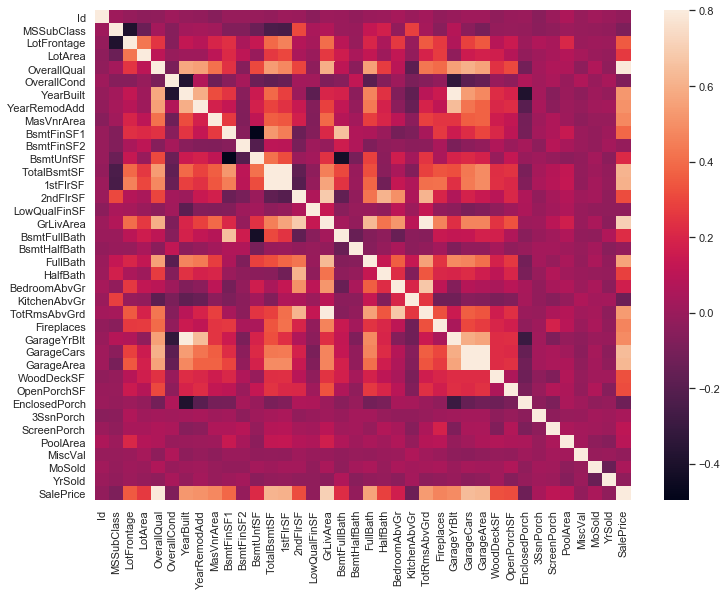

In [161]:
corrmat = df.corr()
f = plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8)

### Extracting 9 features closely related(high dependency) to the label(Price) feature, so as to understand the most important features among all the features and reprsented again in heatmap.

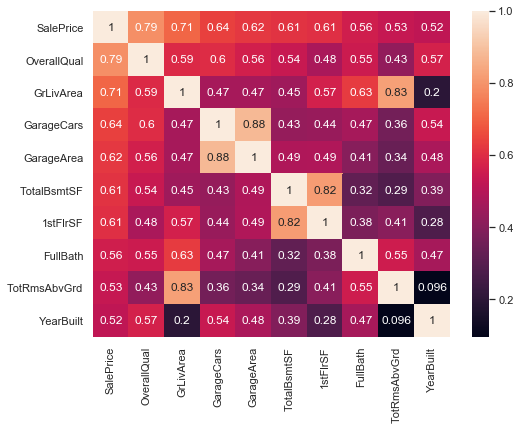

In [162]:
col = corrmat.nlargest(10,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[col].values.T)
sns.set(font_scale=1.0)
f = plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,xticklabels=col.values,yticklabels=col.values)

### The 9 most correlated feature with label(Price) are :
#### 1: OverallQual
#### 2. GrLivArea
#### 3. GarageCars
#### 4. GarageArea
#### 5. TotalBsmtSF
#### 6. 1stFlrSF
#### 7. FullBath
#### 8. TotalRmsAbvGrd
#### 9. YearBuilt


## Data Cleaning.

### Since many features are closely related to each other as they both applies smae functionality and effect on label. Thus keeping one of them so as to improve simplicity.

### As GarageArea and GarageCars have correlation of 0.88, we drop GarageArea.
### As 1stFlrSF and TotalBsmtSF have correlation of 0.82, we drop 1stFlrSF.
### As GarageYrBlt and YearBuilt, its ethical to choose only one of them.
### As TotRmsAbvGrd and GrLivArea have correlation of 0.83 we drop TotRmsAbvGrd.

### We keep the to be dropped columns in cols.

In [163]:
cols = ['TotRmsAbvGrd','GarageArea','1stFlrSF','GarageYrBlt']

### Exploring the null values in different features and percentage of null values to total values and storing it in 'data' dataFrame.

In [164]:
x = df.isnull().sum().sort_values(ascending=False)
y = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
data = pd.concat([x,y],axis=1,keys=['total','percent'])
data.head(22)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### We drop the columns whose null values percentage are more than 80%.
### While exploring the data dataFrame we find the features who are correlated to other  features so we drop them.

In [165]:
cols.extend(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond',
              'GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1',
               'BsmtCond','BsmtQual','MasVnrArea','MasVnrType'])
cols

['TotRmsAbvGrd',
 'GarageArea',
 '1stFlrSF',
 'GarageYrBlt',
 'PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType']

In [166]:
len(col)

10

In [167]:
df = df.drop(cols,axis=1)
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Since Electrical feature has only 1 null value, so we only drop the record corresponding to tht null value.

In [168]:
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

0

### So no null values present in dataset

### Extracting the categorical data type feature

In [169]:
col = df.dtypes[df.dtypes == 'object'].index
col

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### Encoding the categorical features to numerical category by providing them with category codes.

In [170]:
for c in col:
    df[c] = df[c].astype('category')
    df[c] = df[c].cat.codes
    
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


### Dropping the id column as it just serves a purpose of indexing the records

In [171]:
df = df.drop('Id',axis=1)

In [172]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,8450,1,3,3,0,4,0,5,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,9600,1,3,3,0,2,0,24,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,11250,1,0,3,0,4,0,5,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,9550,1,0,3,0,0,0,6,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,14260,1,0,3,0,2,0,15,...,0,0,0,0,0,12,2008,8,4,250000


### The data is ready for preprocessing.

## Preprocessing Data

### Splitting data into feature and label data frame.

In [173]:
y = df['SalePrice']
X = df.drop('SalePrice',axis=1)

### Counting the total number of numerical data.

In [174]:
num_col = []
for i in X.columns:
    if i not in col:
        num_col.append(i)
num_col

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [175]:
len(num_col)

30

### Feature Scaling of features data frame for speeding up computation

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [180]:
X

array([[ 0.07373171, -0.04554757, -0.20712488, ...,  0.13882596,
         0.31398524,  0.20857685],
       [-0.87197875, -0.04554757, -0.09190878, ..., -0.61413713,
         0.31398524,  0.20857685],
       [ 0.07373171, -0.04554757,  0.07340128, ...,  0.13882596,
         0.31398524,  0.20857685],
       ...,
       [ 0.31015932, -0.04554757, -0.14781364, ...,  1.64475213,
         0.31398524,  0.20857685],
       [-0.87197875, -0.04554757, -0.08018679, ...,  1.64475213,
         0.31398524,  0.20857685],
       [-0.87197875, -0.04554757, -0.05814545, ...,  0.13882596,
         0.31398524,  0.20857685]])

### Splitting The data into traing and test set. with test size 30% of total data.

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)

### Total dimension of test data.

In [208]:
X_test.shape

(438, 58)

## Buliding Model

### Apllying some model of linear regression from scikit-learn

### A linear regression model from linear_model.

In [209]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculating the root mean squared error of log of actual and prdicted price on training set. It should be as low as possible but not too low which would coespond top overfitting.

In [210]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(np.log(reg.predict(X_train)),np.log(y_train))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.16227072462725614

### looking god enough.

### Calculation of r-score for regression model on both training and test set. usually between 0 to 1, close to 1 appreciated.

In [211]:
reg.score(X_train,y_train)

0.8170120342396561

In [212]:
reg.score(X_test,y_test)

0.8520520760655916

### Since r-square of both traing and test set are almost equal, it establishes a bias-variance tradeoff in a poisitive manner.

###  Calculating root mean squared error of log of actual and prdicted price on test set.

In [213]:
lin_mse = mean_squared_error(np.log(reg.predict(X_test)),np.log(y_test))
lin_rmse = np.sqrt(lin_mse)
lin_rmse


0.1511256695635099

### Applying a Random Forest Regressor of Ensemble Model.

In [252]:
from sklearn.ensemble import RandomForestRegressor
mod = RandomForestRegressor(n_estimators=40,n_jobs=-1)
mod.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [253]:
mod.score(X_train,y_train)

0.9770335810596693

In [254]:
lin_mse = mean_squared_error(np.log(reg.predict(X_train)),np.log(y_train))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.16227072462725614

In [255]:
mod.score(X_test,y_test)

0.8726977257408927

In [259]:
X_trains = pd.DataFrame(X_train)
X_trains

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.546587,-0.045548,0.045349,0.06426,-1.378212,-1.098359,-0.026189,0.604953,3.394405,-1.205898,...,-0.704845,0.196851,-0.116380,-0.270308,-0.068715,-0.087718,1.360202,0.138826,0.313985,0.208577
1,-0.871979,-0.045548,0.277384,0.06426,-1.378212,0.314785,-0.026189,0.604953,-0.225797,-0.872961,...,0.261270,-0.359464,-0.116380,-0.270308,-0.068715,-0.087718,-1.599030,0.891789,0.313985,0.208577
2,-0.871979,-0.045548,-0.259223,0.06426,0.751133,0.314785,-0.026189,0.604953,-0.225797,-0.040619,...,0.019741,-0.359464,-0.116380,-0.270308,-0.068715,-0.087718,0.250490,0.891789,0.313985,0.208577
3,0.546587,-0.045548,-0.063856,0.06426,0.751133,0.314785,-0.026189,0.604953,-0.225797,-0.207087,...,-0.704845,-0.359464,-0.116380,-0.270308,14.267759,-0.087718,0.250490,0.138826,0.313985,0.208577
4,-0.162696,-0.045548,0.048154,0.06426,0.751133,0.314785,-0.026189,0.604953,-0.225797,-0.872961,...,0.321652,-0.359464,-0.116380,-0.270308,-0.068715,-0.087718,0.250490,0.891789,0.313985,0.208577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,-0.871979,-0.045548,0.051260,0.06426,-1.378212,0.314785,-0.026189,-1.860483,-0.225797,-0.040619,...,0.065028,-0.359464,-0.116380,3.137396,-0.068715,-0.087718,-0.489318,0.138826,0.313985,0.208577
1017,0.546587,-0.045548,0.565023,0.06426,-1.378212,0.314785,-0.026189,-0.627765,-0.225797,1.957003,...,2.012352,-0.359464,-0.116380,-0.270308,-0.068715,-0.087718,-0.119414,-0.614137,0.313985,0.208577
1018,2.438008,1.536688,-0.864358,0.06426,0.751133,0.314785,-0.026189,0.604953,-0.225797,-1.705304,...,-0.282170,-0.359464,-0.116380,-0.270308,-0.068715,-0.087718,-0.489318,-0.614137,0.313985,0.208577
1019,0.073732,-0.045548,-0.176568,0.06426,-1.378212,0.314785,-0.026189,-0.627765,-0.225797,-0.706493,...,-0.704845,-0.359464,5.614046,-0.270308,-0.068715,-0.087718,-0.119414,0.891789,0.313985,0.208577


### Tuning a Hyper-parameters little bit.

In [276]:
mod = RandomForestRegressor(n_estimators=40,n_jobs=-1,min_samples_split=6,random_state=20)
mod.fit(X_trains,y_trains)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=-1, oob_score=False,
                      random_state=20, verbose=0, warm_start=False)

In [277]:
mod.score(X_trains,y_trains)

0.9682065550041337

In [278]:
lin_mse = mean_squared_error(np.log(reg.predict(X_trains)),np.log(y_trains))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.16227072462725614

### So, Random Forest Model provides a r-score of 0.96 for training set and 0.87 for test set and a overall root mean squared error of log of actual and prdicted price on training set of around 0.16.